In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating some random returns
n_days      = 400
mean_return = 0.001  # Daily mean return
std_return  = 0.02    # Daily standard deviation of returns
returns     = np.random.normal(mean_return, std_return, n_days)

# Create a datetime index for plotting
start_date = pd.to_datetime('2023-01-01')
date_index = pd.date_range(start_date, periods=n_days, freq='D')

# Generate prices from the returns
starting_price = 1000
prices = starting_price * (1 + np.cumsum(returns))

# Calculate statistics for returns
mean_return = np.mean(returns)
std_return  = np.std(returns)

# Number of forecasted prices
n_forecast_days = 150

# Generate multiple scenarios using Monte Carlo simulation
n_simulations     = 300
simulated_returns = np.random.normal(mean_return, std_return, size=(n_forecast_days, n_simulations))

# Calculate cumulative returns for each simulation
cumulative_returns = np.cumsum(simulated_returns, axis=0)

# Add starting price to each simulation path
simulated_prices =  prices[-1]* (1 + np.vstack([np.zeros((1, n_simulations)), cumulative_returns]))

# Create a DataFrame to store the simulated prices
forecast_date_index = pd.date_range(date_index[-1] + pd.Timedelta(days=1), periods=n_forecast_days, freq='D')
forecasted_prices_df = pd.DataFrame(simulated_prices[:-1], index=forecast_date_index)

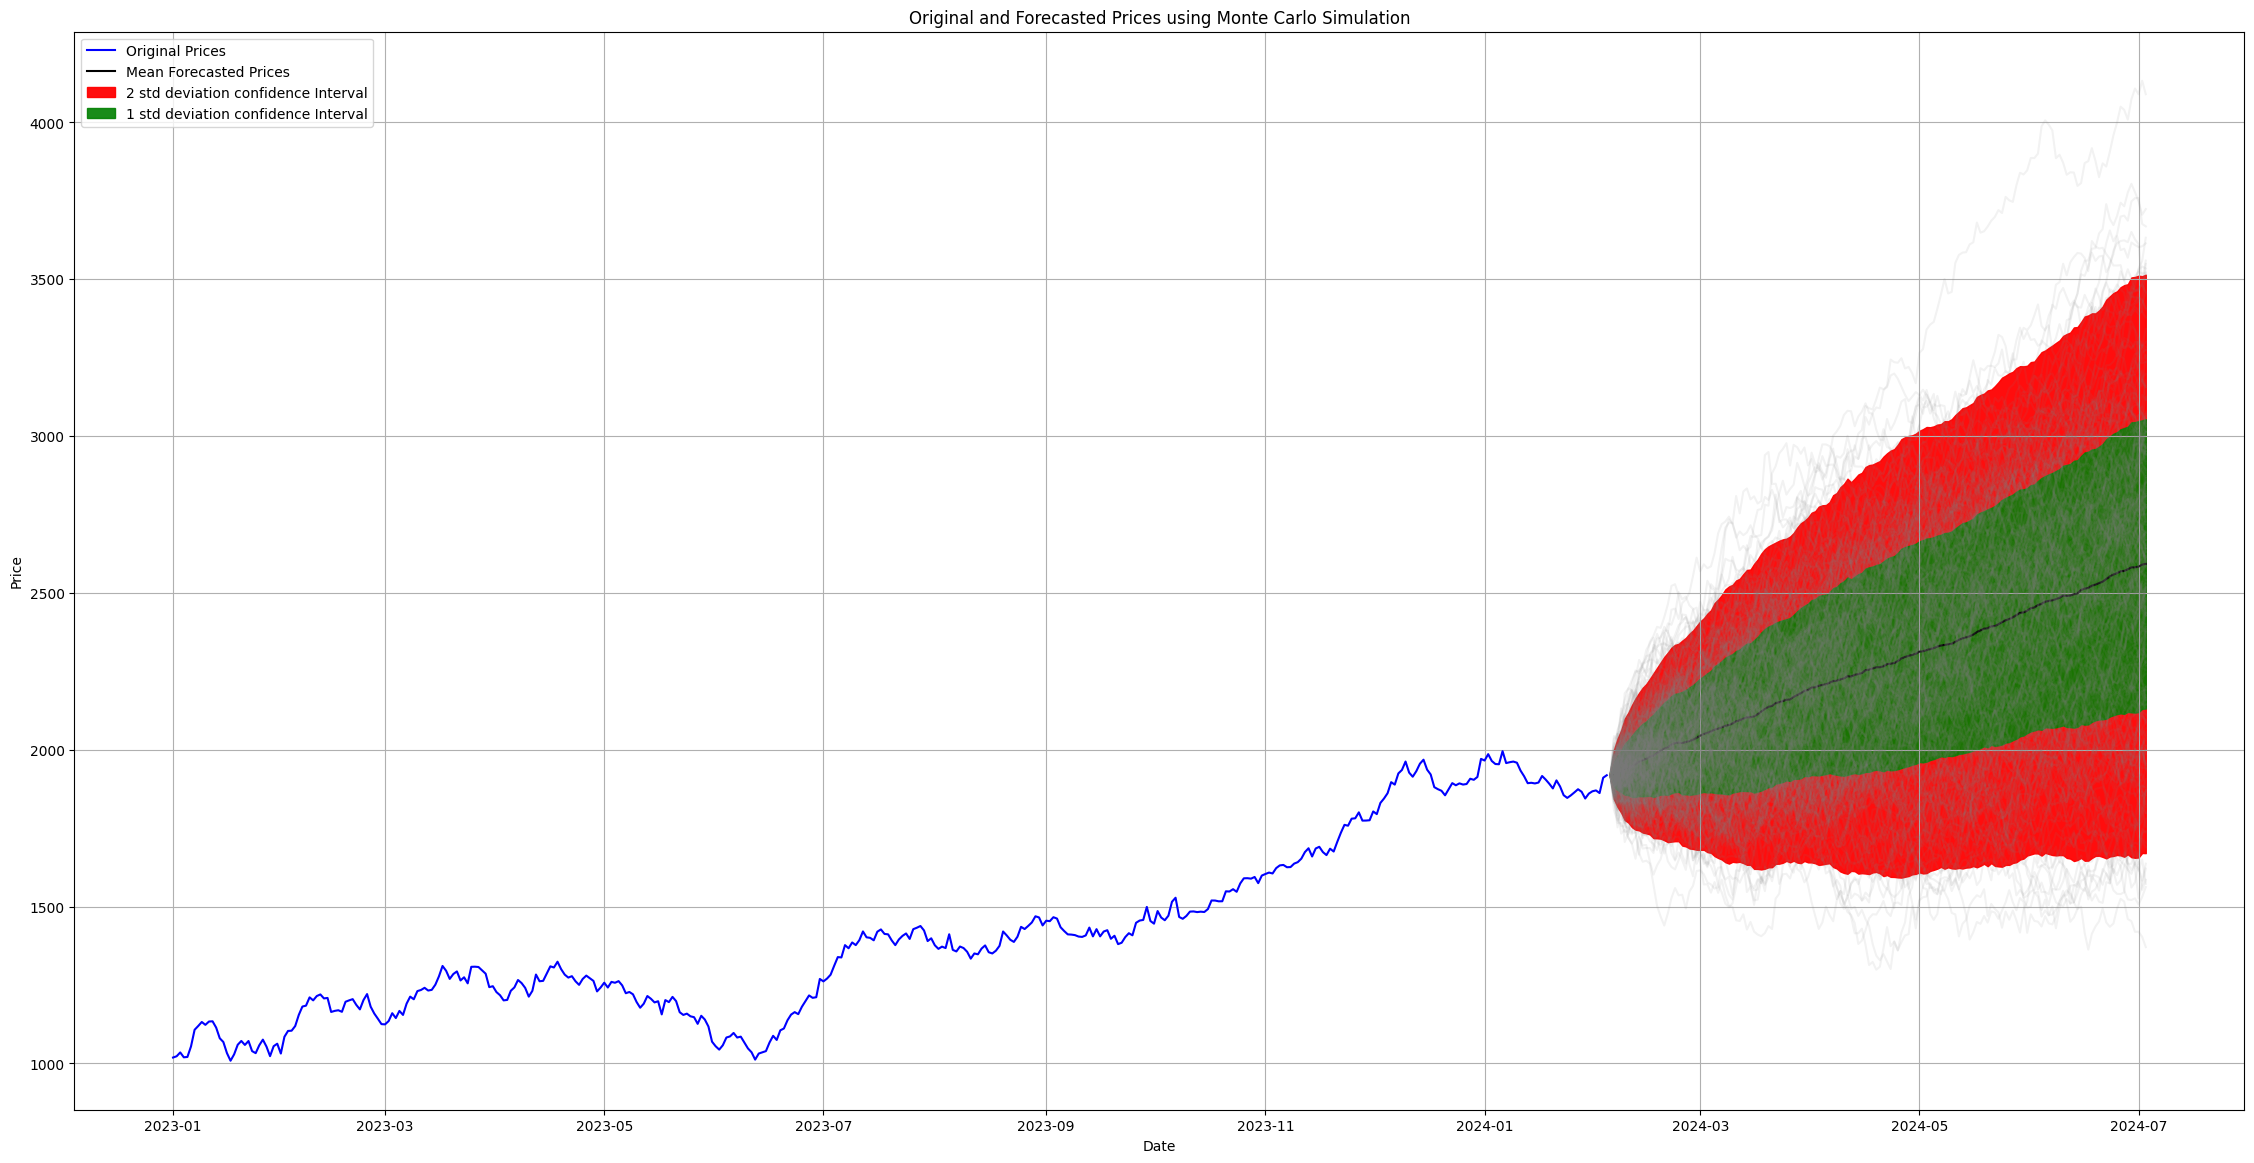

In [3]:
# Calculate mean and standard deviation of simulated prices at each time step
mean_simulated_prices = np.mean(simulated_prices, axis=1)
std_simulated_prices  = np.std(simulated_prices, axis=1)

# Calculate upper and lower bounds of the confidence intervals
upper_bound_std1 = mean_simulated_prices + 1*std_simulated_prices
lower_bound_std1 = mean_simulated_prices - 1*std_simulated_prices

upper_bound_std2 = mean_simulated_prices + 2*std_simulated_prices
lower_bound_std2 = mean_simulated_prices - 2*std_simulated_prices

mean_simulated_prices = mean_simulated_prices[:-1]
upper_bound_std1      = upper_bound_std1[:-1]
lower_bound_std1      = lower_bound_std1[:-1]
upper_bound_std2      = upper_bound_std2[:-1]
lower_bound_std2      = lower_bound_std2[:-1]

plt.figure(figsize=(28, 14))
plt.plot(date_index, prices, label='Original Prices', color='b')

plt.plot(forecast_date_index, mean_simulated_prices, label='Mean Forecasted Prices', color='black')

for i in range(n_simulations):
    plt.plot(forecast_date_index, forecasted_prices_df[i], color='gray', alpha=0.1)

plt.fill_between(forecast_date_index, lower_bound_std2, upper_bound_std2, color='red'  , alpha=0.95, label='2 std deviation confidence Interval')
plt.fill_between(forecast_date_index, lower_bound_std1, upper_bound_std1, color='green', alpha=0.9 , label='1 std deviation confidence Interval')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original and Forecasted Prices using Monte Carlo Simulation')
plt.legend()
plt.grid(True)
plt.show()